#Adquisición de datos

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('count_train.csv')
df2 = pd.read_csv('count_test.csv')

In [3]:
df[df['class']=='up']
X = df.drop('class', axis=1)
Y = df['class']

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=69)

In [5]:
X_test = df2.drop('class', axis=1)
Y_test = df2['class']

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(443, 132)
(443,)
(79, 132)
(79,)
(71, 132)
(71,)


#Entrenamiento con sklearn

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
import pickle

In [8]:
model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, random_state=69)

n_epochs = 100
train_losses = []
val_losses = []

In [9]:
classes = np.unique(Y_train)

for epoch in range(n_epochs):
    model.partial_fit(X_train, Y_train, classes=classes)

    # Training loss
    y_pred = model.predict_proba(X_train)
    train_loss = log_loss(Y_train, y_pred)
    train_losses.append(train_loss)

    # Validation loss
    y_val_pred = model.predict_proba(X_val)
    val_loss = log_loss(Y_val, y_val_pred)
    val_losses.append(val_loss)

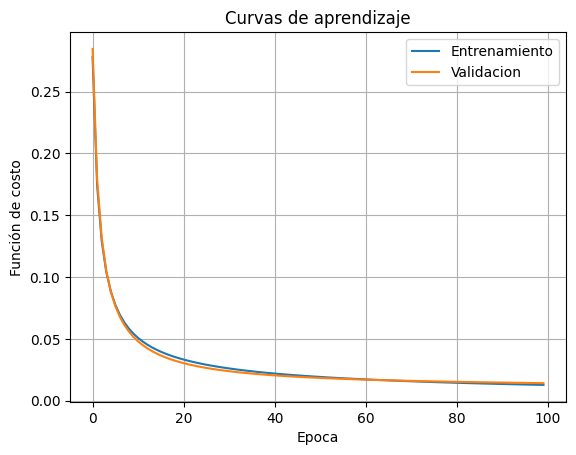

In [10]:
#curvas de aprendizaje (losses)
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_losses, label='Entrenamiento')
plt.plot(range(n_epochs), val_losses, label='Validacion')
plt.xlabel('Epoca')
plt.ylabel('Función de costo')
plt.title('Curvas de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
y_test_pred = model.predict(X_test)

In [14]:
y_test_pred

array(['down', 'down', 'down', 'down', 'down', 'down', 'down', 'down',
       'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down',
       'down', 'down', 'down', 'down', 'down', 'down', 'up', 'up', 'up',
       'up', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'down',
       'down', 'down', 'down', 'up', 'up', 'up', 'up', 'up', 'up', 'up',
       'up', 'up', 'down', 'down', 'down', 'down', 'down', 'down', 'down',
       'down', 'down', 'down', 'down', 'down', 'up', 'up', 'up', 'up',
       'up', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'down'],
      dtype='<U4')

In [15]:
Y_test

,class
0,down
1,down
2,down
3,down
4,down
...,...
66,down
67,down
68,down
69,down


#Evaluación y exportado a pickle

In [16]:
precision_score(Y_test, y_test_pred, average='macro')

1.0

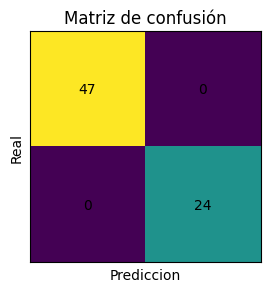

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(3,3))
plt.title('Matriz de confusión')
plt.imshow(confusion_matrix)
plt.ylabel('Real')
plt.xlabel('Prediccion')
plt.xticks([])
plt.yticks([])

filas, cols = confusion_matrix.shape
for r in range(filas):
  for c in range(cols):
    plt.text(c, r, str(confusion_matrix[r, c]),
        ha='center', va='center', color='black')
plt.show()

In [18]:
with open('count.pkl', 'wb') as f:
  pickle.dump(model, f)